In [1]:
#!pip install missingno
#!pip install imblearn
#!pip install sklearn


In [2]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

# machine learning only sklearn for this rule
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df_xtrain = pd.read_csv('X_train.csv')
df_ytrain = pd.read_csv('Y_train.csv')
df_xtest = pd.read_csv('X_test.csv')

In [4]:
print(df_xtrain.shape)
print(df_ytrain.shape)
print(df_xtest.shape)

(700, 9)
(700, 2)
(300, 9)


In [5]:
print(df_xtrain.head())
print(df_xtrain.tail())

   Unnamed: 0        X1        X2        X3        X4        X5         X6  \
0           1 -1.088464  0.014386       NaN  1.456049  0.060979   1.056200   
1           2 -2.350068       NaN  0.789600       NaN -0.195590   9.578666   
2           3       NaN  0.046181 -3.132041  1.162841  0.350587  25.932249   
3           4       NaN -0.000446  1.331621  0.903513 -0.065891        NaN   
4           5  3.446600       NaN -3.059974 -1.074670  0.256028  -0.086493   

          X7        X8  
0        NaN -1.236955  
1  40.456108 -2.323309  
2        NaN  0.627793  
3  -2.205151  0.269463  
4 -38.079476 -2.882153  
     Unnamed: 0        X1        X2        X3        X4        X5         X6  \
695         696 -0.376460 -0.015520 -2.018474 -6.587740 -0.025592        NaN   
696         697  0.468029 -0.020679 -0.916403 -3.124168       NaN  11.157532   
697         698 -1.132139  0.017634  1.747889  3.296725 -0.073714   3.753853   
698         699  0.293704 -0.005155  1.905605 -2.734645      

In [6]:
df_xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   X1          569 non-null    float64
 2   X2          555 non-null    float64
 3   X3          570 non-null    float64
 4   X4          551 non-null    float64
 5   X5          567 non-null    float64
 6   X6          551 non-null    float64
 7   X7          573 non-null    float64
 8   X8          554 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 49.3 KB


In [7]:
df_xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   X1          243 non-null    float64
 2   X2          237 non-null    float64
 3   X3          229 non-null    float64
 4   X4          245 non-null    float64
 5   X5          231 non-null    float64
 6   X6          235 non-null    float64
 7   X7          232 non-null    float64
 8   X8          238 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 21.2 KB


In [8]:
df_ytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  700 non-null    int64
 1   y           700 non-null    int64
dtypes: int64(2)
memory usage: 11.1 KB


In [9]:
df_xtrain.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8
count,700.00000,569.000000,555.000000,570.000000,551.000000,567.000000,551.000000,573.000000,554.000000
mean,350.50000,-0.665789,-0.000612,-0.301095,-1.458716,0.030456,1.721084,3.616668,0.095503
std,202.21688,1.575776,0.018427,1.617654,3.427833,0.171341,8.826204,30.075149,3.842682
min,1.00000,-5.370627,-0.059285,-5.092575,-10.837027,-0.481126,-28.681492,-77.998352,-9.523111
25%,175.75000,-1.734079,-0.013353,-1.391687,-3.812225,-0.067673,-4.273389,-16.917339,-2.724534
50%,350.50000,-0.804624,-0.000503,-0.302401,-1.477115,0.037902,1.222458,2.712126,-0.112160
75%,525.25000,0.373384,0.010473,0.803552,0.879388,0.144814,7.495430,23.547139,2.760170
max,700.00000,3.763079,0.056489,4.279519,8.873655,0.497081,30.668003,91.332278,10.596478


In [10]:
#df_xtest =df_xtest.drop(columns=['Unnamed: 0'])
df_xtest.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8
count,300.000000,243.000000,237.000000,229.000000,245.000000,231.000000,235.000000,232.000000,238.000000
mean,150.500000,-0.721844,0.001772,-0.124399,-0.961998,0.022599,1.967476,3.820317,-0.153803
std,86.746758,1.532176,0.018335,1.724193,3.482088,0.175195,8.612906,29.502802,3.389415
min,1.000000,-4.713949,-0.045553,-4.206433,-10.833201,-0.399690,-22.242832,-63.108282,-8.463301
25%,75.750000,-1.762284,-0.009515,-1.214655,-3.017246,-0.085236,-4.808454,-16.151254,-2.804181
50%,150.500000,-0.799251,0.002606,-0.211591,-1.336412,0.029286,2.120633,3.672329,0.062809
75%,225.250000,0.248661,0.012681,1.089399,1.225713,0.127550,7.383231,20.640573,1.972062
max,300.000000,4.518167,0.074686,3.961871,11.239079,0.537693,23.532164,95.847234,11.444221


In [11]:
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    print(f"Lower_tail: {Lower_tail}")
    print(f"Upper_tail: {Upper_tail}")
    print("\n")

In [12]:
cols = ['X1','X2', 'X3','X4','X5','X6','X7','X8']
for x in cols:
    print(x)
    iqr_outliers(df_xtrain[x])

X1
Lower_tail: -4.895274499999999
Upper_tail: 3.5345796999999997


X2
Lower_tail: -0.049092810092499994
Upper_tail: 0.046212137367499996


X3
Lower_tail: -4.6845461751999995
Upper_tail: 4.096410475999999


X4
Lower_tail: -10.8496449962
Upper_tail: 7.916808419


X5
Lower_tail: -0.3864031962125
Upper_tail: 0.4635449680475


X6
Lower_tail: -21.92661748425
Upper_tail: 25.14865902575


X7
Lower_tail: -77.61405778
Upper_tail: 84.24385766


X8
Lower_tail: -10.951590301875
Upper_tail: 10.987226383124998




Plots X1


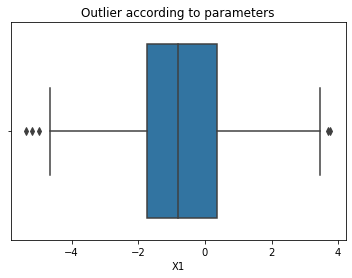

Plots X2


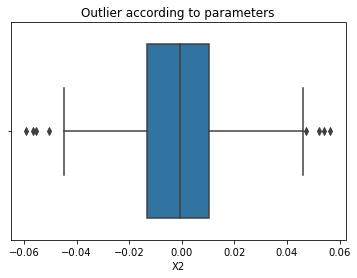

Plots X3


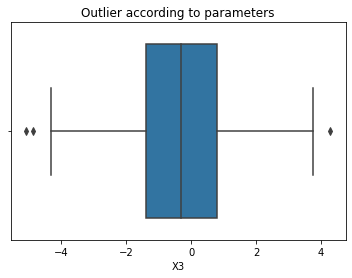

Plots X4


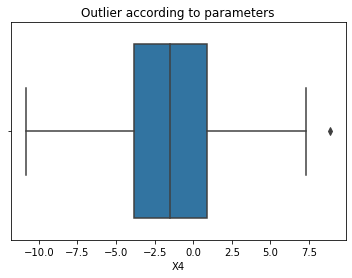

Plots X5


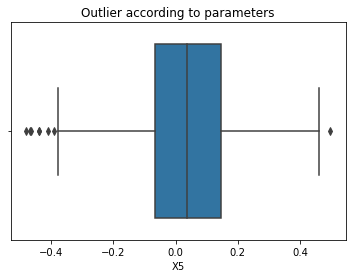

Plots X6


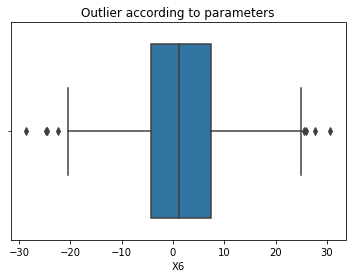

Plots X7


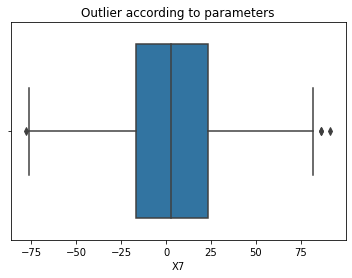

Plots X8


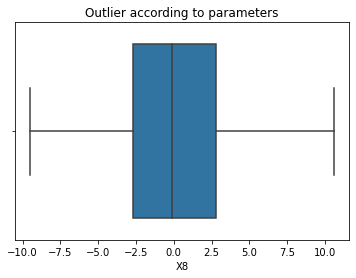

In [13]:
cols = ['X1','X2','X3','X4','X5','X6','X7','X8']
for x in cols:
    print(f'Plots {x}')
    sns.boxplot(df_xtrain[x])
    plt.title("Outlier according to parameters")
    plt.show()

In [14]:
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X1 < -4.895274499999999].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X1 > 3.5345796999999997].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X2 < -0.049092810092499994].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X2 > 0.046212137367499996].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X3 < -4.6845461751999995].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X3 > 4.096410475999999].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X4 < -10.8496449962].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X4 > 7.916808419].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X5 < -0.3864031962125].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X5 > 0.4635449680475].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X6 < -21.92661748425].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X6 > 25.14865902575].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X7 < -77.61405778].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X7 > 84.24385766].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X8 < -10.951590301875].index)
#df_xtrain = df_xtrain.drop(df_xtrain[df_xtrain.X8 > 10.987226383124998].index)

In [15]:
print('Train columns with null values:\n', df_xtrain.isnull().sum())

Train columns with null values:
 Unnamed: 0      0
X1            131
X2            145
X3            130
X4            149
X5            133
X6            149
X7            127
X8            146
dtype: int64


<AxesSubplot:>

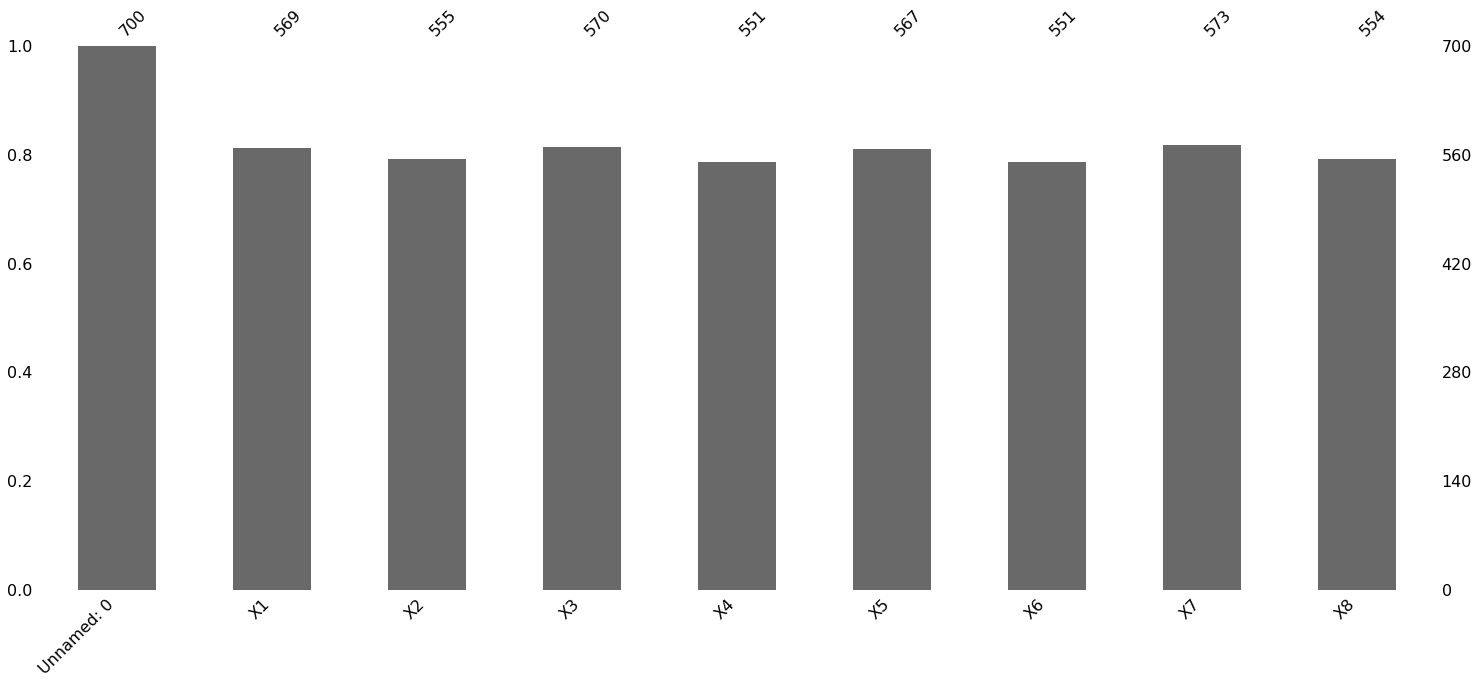

In [16]:
msno.bar(df_xtrain) 

In [17]:
print('Test/Validation columns with null values:\n', df_xtest.isnull().sum())

Test/Validation columns with null values:
 Unnamed: 0     0
X1            57
X2            63
X3            71
X4            55
X5            69
X6            65
X7            68
X8            62
dtype: int64


In [18]:
df_xtest[cols].agg(['mean','median', 'std'], axis="rows")

,X1,X2,X3,X4,X5,X6,X7,X8
mean,-0.721844,0.001772,-0.124399,-0.961998,0.022599,1.967476,3.820317,-0.153803
median,-0.799251,0.002606,-0.211591,-1.336412,0.029286,2.120633,3.672329,0.062809
std,1.532176,0.018335,1.724193,3.482088,0.175195,8.612906,29.502802,3.389415


In [19]:
#df_xtest["X1"].fillna(df_xtrain["X1"].mean(), inplace = True)
#df_xtest["X2"].fillna(df_xtrain["X2"].mean(), inplace = True)
#df_xtest["X3"].fillna(df_xtrain["X3"].mean(), inplace = True)
#df_xtest["X4"].fillna(df_xtrain["X4"].mean(), inplace = True)
#df_xtest["X5"].fillna(df_xtrain["X5"].mean(), inplace = True)
#df_xtest["X6"].fillna(df_xtrain["X6"].mean(), inplace = True)
#df_xtest["X7"].fillna(df_xtrain["X7"].mean(), inplace = True)
#df_xtest["X8"].fillna(df_xtrain["X8"].mean(), inplace = True)

<AxesSubplot:>

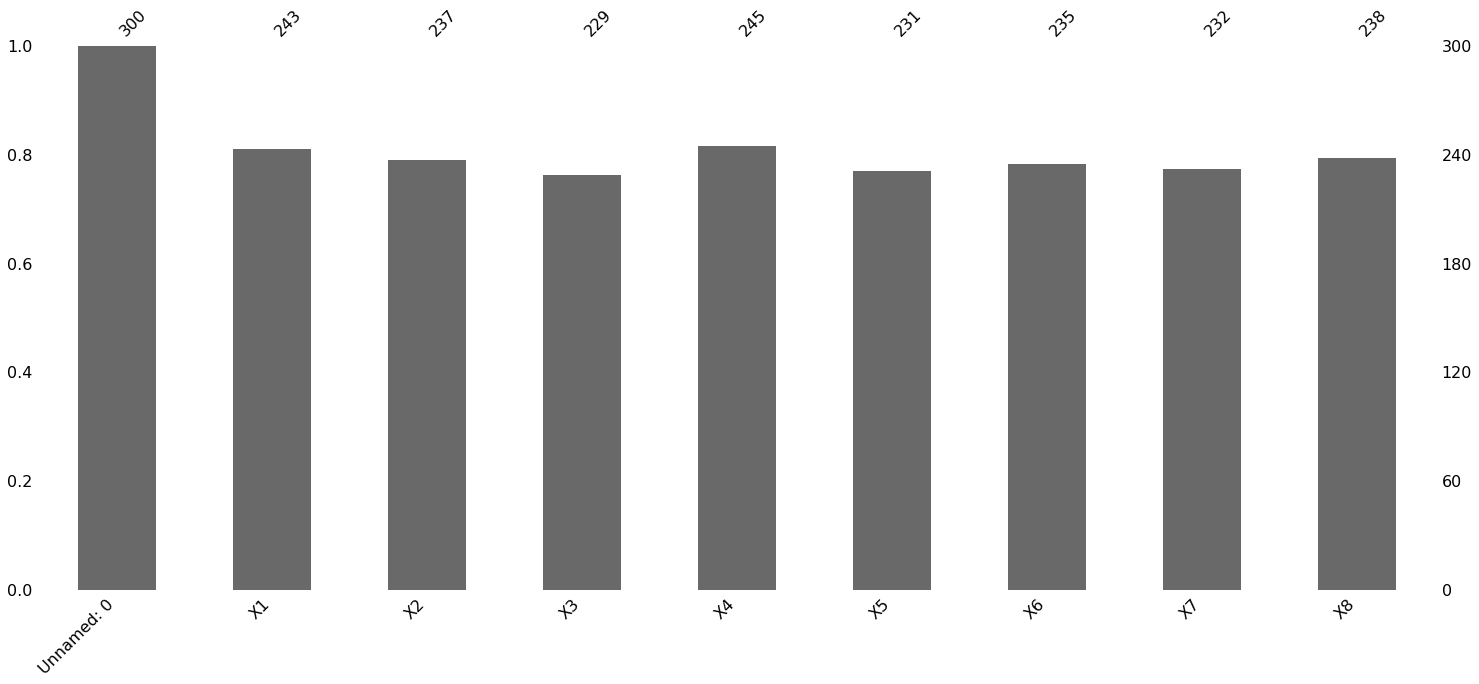

In [20]:
msno.bar(df_xtest) 

In [21]:
cols = ['X1','X2', 'X3','X4','X5','X6','X7','X8']
df_xtrain[cols].agg(['mean','median', 'std'], axis="rows")

,X1,X2,X3,X4,X5,X6,X7,X8
mean,-0.665789,-0.000612,-0.301095,-1.458716,0.030456,1.721084,3.616668,0.095503
median,-0.804624,-0.000503,-0.302401,-1.477115,0.037902,1.222458,2.712126,-0.112160
std,1.575776,0.018427,1.617654,3.427833,0.171341,8.826204,30.075149,3.842682


In [22]:
df_xtrain["X1"].fillna(df_xtrain["X1"].mean(), inplace = True)
df_xtrain["X2"].fillna(df_xtrain["X2"].mean(), inplace = True)
df_xtrain["X3"].fillna(df_xtrain["X3"].mean(), inplace = True)
df_xtrain["X4"].fillna(df_xtrain["X4"].mean(), inplace = True)
df_xtrain["X5"].fillna(df_xtrain["X5"].mean(), inplace = True)
df_xtrain["X6"].fillna(df_xtrain["X6"].mean(), inplace = True)
df_xtrain["X7"].fillna(df_xtrain["X7"].mean(), inplace = True)
df_xtrain["X8"].fillna(df_xtrain["X8"].mean(), inplace = True)

<AxesSubplot:>

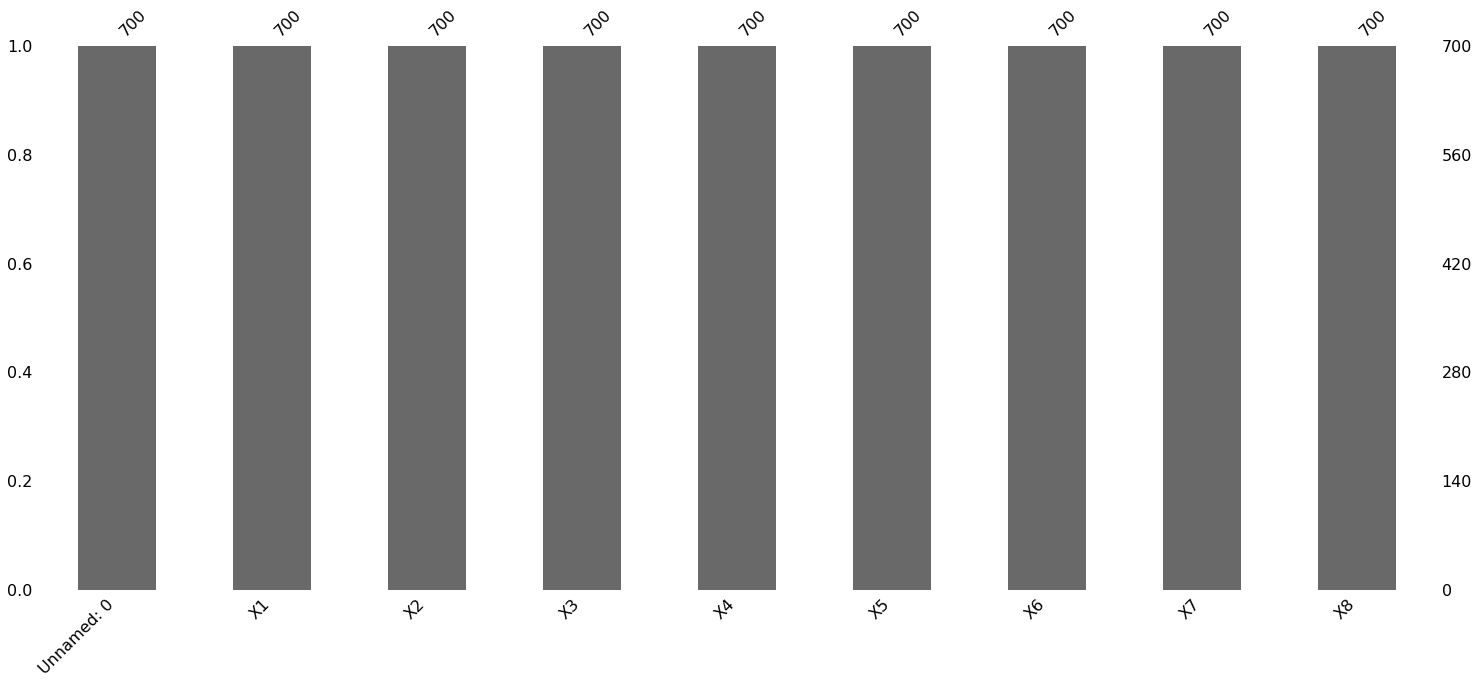

In [23]:
msno.bar(df_xtrain) 

Number of 0:  242
Number of 1 :  231
Number of 2 :  227


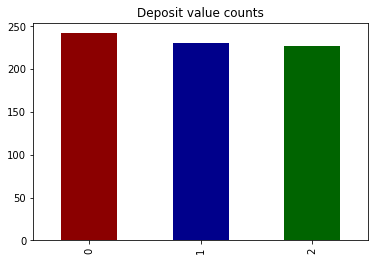

In [24]:
n, y,z = (df_ytrain['y'].value_counts())
df_ytrain['y'].value_counts().plot.bar(color=['darkred','darkblue','darkgreen'], title = 'Deposit value counts');
print('Number of 0: ',n)
print('Number of 1 : ',y)
print('Number of 2 : ',z)


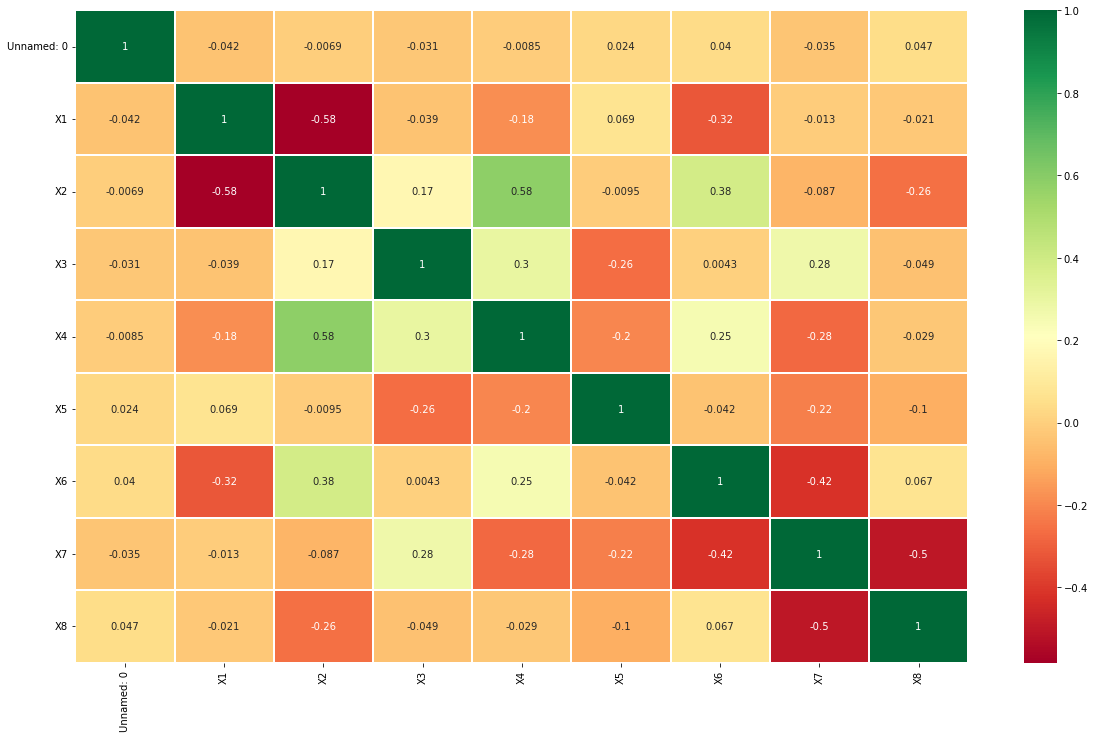

In [25]:
sns.heatmap(df_xtrain.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [26]:
colsSelect1 = ['X1','X2','X3','X5','X6','X7','X8']

x_train = np.array(df_xtrain[colsSelect1])                
y_train = np.array(df_ytrain["y"]) 
x_test = np.array(df_xtest[colsSelect1]) 
print(f"x1",x_train)
print(f"y1",y_train)
print(f"x2",x_test)

x1 [[-1.08846363e+00  1.43858344e-02 -3.01094942e-01 ...  1.05620035e+00
   3.61666831e+00 -1.23695474e+00]
 [-2.35006796e+00 -6.11905758e-04  7.89600441e-01 ...  9.57866636e+00
   4.04561080e+01 -2.32330918e+00]
 [-6.65788610e-01  4.61810190e-02 -3.13204080e+00 ...  2.59322493e+01
   3.61666831e+00  6.27792620e-01]
 ...
 [-1.13213871e+00  1.76336650e-02  1.74788861e+00 ...  3.75385336e+00
   2.16236013e+00  5.91456001e-02]
 [ 2.93703540e-01 -5.15538246e-03  1.90560512e+00 ...  2.88418569e+00
   4.74956526e+01 -4.86309674e+00]
 [-7.04848625e-01  5.33335728e-03 -1.40867400e+00 ...  1.72108380e+00
  -4.14647944e+01  1.53380567e+00]]
y1 [2 2 2 1 0 0 2 0 1 0 0 2 0 1 0 2 2 1 0 1 0 2 2 1 0 1 1 1 1 1 1 0 1 2 0 0 0
 0 1 2 1 0 0 0 2 2 1 0 1 1 0 0 0 2 0 1 1 1 2 0 2 2 0 2 0 2 2 0 0 1 2 1 1 2
 1 1 1 2 0 0 0 0 2 2 0 1 0 0 2 0 0 2 0 1 2 2 2 2 0 0 2 0 0 1 1 1 2 0 1 1 0
 2 1 2 0 0 2 0 1 1 0 0 0 0 1 1 0 2 0 2 1 0 2 0 0 0 2 0 2 0 2 1 1 2 2 2 1 1
 2 1 2 2 0 2 1 0 2 1 1 1 1 2 2 2 1 0 0 2 2 1 2 1 2 0 0 0 0

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.3,random_state=1)
model=RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=3, n_estimators=1000)
model.fit(x_train, y_train)
forest_pred = model.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT FOR FEATURE SELECT1\n\n', classification_report(y_test, forest_pred))


 [[54  9  8]
 [15 49 11]
 [14 19 31]]
CLASSIFICATION REPORT FOR FEATURE SELECT1

               precision    recall  f1-score   support

           0       0.65      0.76      0.70        71
           1       0.64      0.65      0.64        75
           2       0.62      0.48      0.54        64

    accuracy                           0.64       210
   macro avg       0.64      0.63      0.63       210
weighted avg       0.64      0.64      0.63       210



In [28]:
colsSelect2 = ['X1','X2', 'X3','X4','X5','X6','X7','X8']
x_train = np.array(df_xtrain[colsSelect2])                
y_train = np.array(df_ytrain["y"])  

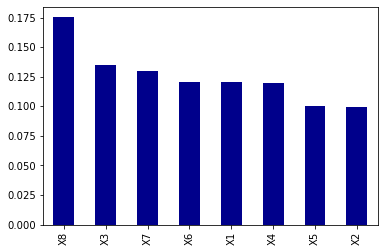

In [29]:
model = ExtraTreesClassifier()
model.fit(x_train,y_train)

feat_importances = pd.Series(model.feature_importances_, index=colsSelect2)
feat_importances.nlargest(20).plot(kind='bar',color='darkblue')
plt.show()

In [30]:
colsSelect2 = ['X8', 'X3','X7','X6','X1','X4']
x_train = np.array(df_xtrain[colsSelect2])                
y_train = np.array(df_ytrain["y"])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.3,random_state=1)
model=RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=3, n_estimators=900)
model.fit(x_train, y_train)
forest_pred = model.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT FOR FEATURE SELECT1\n\n', classification_report(y_test, forest_pred))


 [[59 10  2]
 [19 46 10]
 [14 15 35]]
CLASSIFICATION REPORT FOR FEATURE SELECT1

               precision    recall  f1-score   support

           0       0.64      0.83      0.72        71
           1       0.65      0.61      0.63        75
           2       0.74      0.55      0.63        64

    accuracy                           0.67       210
   macro avg       0.68      0.66      0.66       210
weighted avg       0.68      0.67      0.66       210



In [32]:
colsfinal = ['X8', 'X3','X7','X6','X1','X4']
x_train1 = np.array(df_xtrain[colsfinal])                
y_train1 = np.array(df_ytrain["y"]) 
x_test1 = np.array(df_xtest[colsfinal]) 

In [33]:
models = []
models.append(('LogisticRegression', LogisticRegression(multi_class='ovr')))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('Extra Trees Ensemble', ExtraTreesClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier(n_estimators=1000)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))


DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC"}

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.3,random_state=1)
model=RandomForestClassifier(n_estimators=1000)
                       
model.fit(x_train, y_train)
forest_pred = model.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT FOR FEATURE SELECT1\n\n', classification_report(y_test, forest_pred))


 [[41  3  9]
 [ 6 30  7]
 [10  9 32]]
CLASSIFICATION REPORT FOR FEATURE SELECT1

               precision    recall  f1-score   support

           0       0.72      0.77      0.75        53
           1       0.71      0.70      0.71        43
           2       0.67      0.63      0.65        51

    accuracy                           0.70       147
   macro avg       0.70      0.70      0.70       147
weighted avg       0.70      0.70      0.70       147



In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.3,random_state=1)
model=DecisionTreeClassifier()
                       
model.fit(x_train, y_train)
forest_pred = model.predict(x_test)
print('\n',confusion_matrix(y_test, forest_pred))
print('CLASSIFICATION REPORT FOR FEATURE SELECT1\n\n', classification_report(y_test, forest_pred))


 [[27  4  7]
 [13 14  8]
 [11  5 14]]
CLASSIFICATION REPORT FOR FEATURE SELECT1

               precision    recall  f1-score   support

           0       0.53      0.71      0.61        38
           1       0.61      0.40      0.48        35
           2       0.48      0.47      0.47        30

    accuracy                           0.53       103
   macro avg       0.54      0.53      0.52       103
weighted avg       0.54      0.53      0.53       103



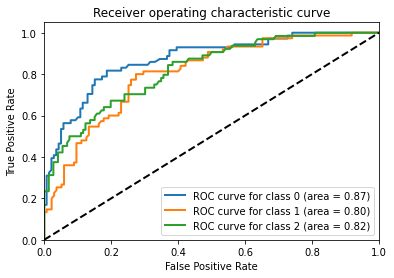

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
%matplotlib inline

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train1, y_train1,test_size=0.3,random_state=1)
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train1, y_train1)
# Predict class probabilities for each sample in the test set
y_pred_proba = model.predict_proba(x_test1)

# Binarize the true labels
y_test_bin = label_binarize(y_test1, classes=[0, 1, 2])

# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
lw = 2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

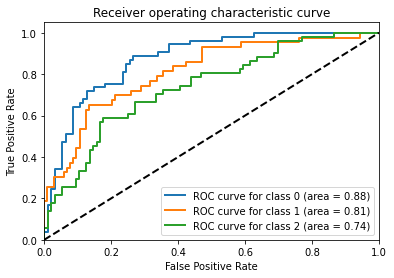

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
%matplotlib inline

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train1, y_train1,test_size=0.3,random_state=1)
model = LinearDiscriminantAnalysis()
model.fit(x_train1, y_train1)
# Predict class probabilities for each sample in the test set
y_pred_proba = model.predict_proba(x_test1)

# Binarize the true labels
y_test_bin = label_binarize(y_test1, classes=[0, 1, 2])

# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
lw = 2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()


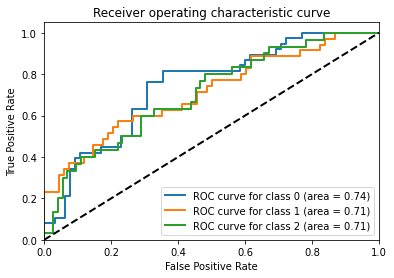

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
%matplotlib inline

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train1, y_train1,test_size=0.3,random_state=1)
model2 = GradientBoostingClassifier()
model2.fit(x_train1, y_train1)
# Predict class probabilities for each sample in the test set
y_pred_proba = model.predict_proba(x_test1)

# Binarize the true labels
y_test_bin = label_binarize(y_test1, classes=[0, 1, 2])

# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
lw = 2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

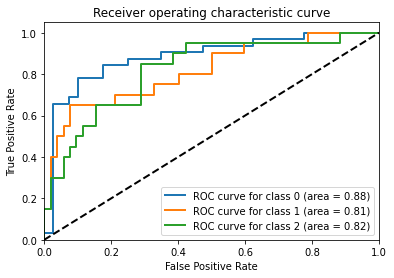

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
%matplotlib inline

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train1, y_train1,test_size=0.3,random_state=1)
model3 = DecisionTreeClassifier()
model.fit(x_train1, y_train1)
# Predict class probabilities for each sample in the test set
y_pred_proba = model.predict_proba(x_test1)

# Binarize the true labels
y_test_bin = label_binarize(y_test1, classes=[0, 1, 2])

# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
lw = 2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()